# Importing the necessary libraries

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 

# Reading the csv file

In [55]:
df=pd.read_csv('Restaurant_Reviews.csv')

In [56]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Data Visualization and Exploratory Data Analysis

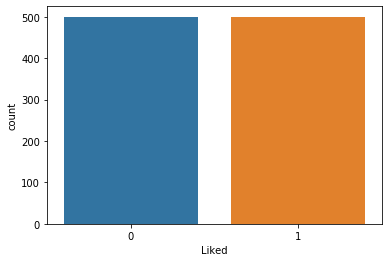

In [57]:
sns.countplot(x='Liked',data=df)

In [58]:
y=df['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [9]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [59]:
pos=df[df['Liked']==1]
pos

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [60]:
neg=df[df['Liked']==0]
neg

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


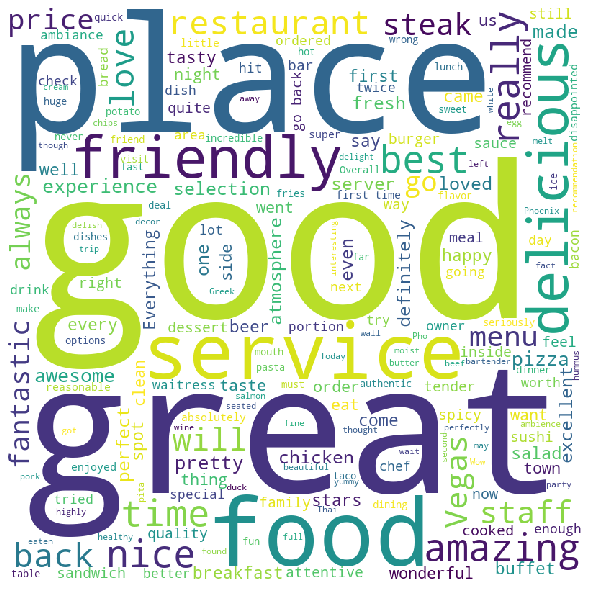

In [61]:
plt.figure(figsize=(8,8))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(' '.join(pos['Review'])) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

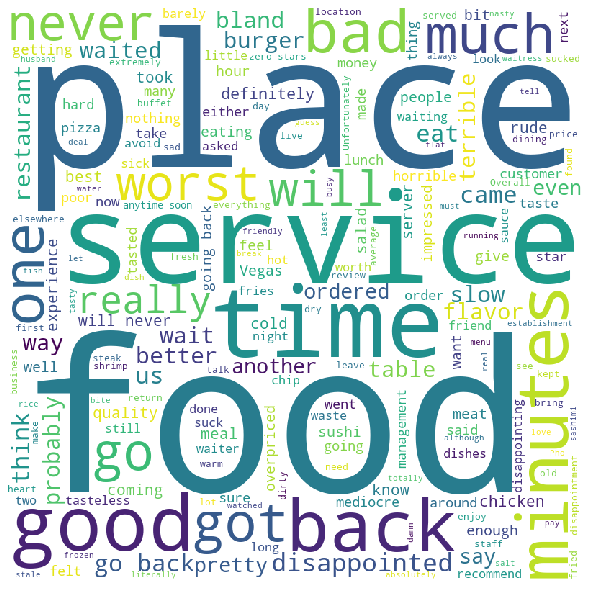

In [11]:
plt.figure(figsize=(8,8))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(' '.join(neg['Review'])) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [62]:
df['Length']=df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


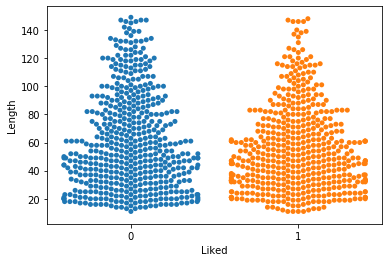

In [63]:
sns.swarmplot(x='Liked',y='Length',data=df)

# Text Pre-processing

In [64]:
df['Review']=df['Review'].str.lower()

In [65]:
df.head()

,Review,Liked,Length
0,wow... loved this place.,1,24
1,crust is not good.,0,18
2,not tasty and the texture was just nasty.,0,41
3,stopped by during the late may bank holiday of...,1,87
4,the selection on the menu was great and so wer...,1,59


# Removing Special characters, punctuations and stopwords

In [87]:
new_stopwords=set(stopwords.words('english'))
new_stopwords.remove('not')
def text_process(mess):
    nopunc=[]
    for letter in mess:
        if letter not in string.punctuation:
            nopunc.append(letter)
    nopunc=''.join(nopunc)
    clean_mess=[]
    for word in nopunc.split():
        if word.lower() not in new_stopwords:
            clean_mess.append(word)
    clean_mess=' '.join(clean_mess)
    return clean_mess

In [96]:
df['Review']=df['Review'].apply(text_process)

In [93]:
df.drop(labels='Processed Review',axis=1,inplace=True)

In [94]:
df.head()

,Review,Liked,Length
0,wow loved place,1,24
1,crust not good,0,18
2,not tasty texture nasty,0,41
3,stopped late may bank holiday rick steve recom...,1,87
4,selection menu great prices,1,59


# Pattern Lemmetization

In [240]:
from pattern.en import lemma
l=[]
for i in m['Review']:
    lw=[]
    for word in i.split():
        w=lemma(word)
        lw.append(w)
    lw=' '.join(lw)
    l.append(lw)
df['Review']=l
df

,Review,Liked,Length
0,wow love place,1,24
1,crust not good,0,18
2,not tasty texture nasty,0,41
3,stop late may bank holiday rick steve recommen...,1,87
4,selection menu great price,1,59
...,...,...,...
995,think food flavor texture lack,0,66
996,appetite instantly go,0,24
997,overall not impress would not go back,0,50
998,whole experience underwhelm think well go ninj...,0,91


# Count Vectorizer

In [224]:
cv=CountVectorizer()
bag_of_words=cv.fit(df['Review'])
features=bag_of_words.get_feature_names()
bow_transform=cv.transform(df['Review']).toarray()
data=pd.DataFrame(bow_transform,columns=features)
data

,10,100,1199,12,15,15lb,17,1979,20,2007,...,yelper,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
data.drop(labels=['10',
 '100',
 '1199',
 '12',
 '15',
 '15lb',
 '17',
 '1979',
 '20',
 '2007',
 '23',
 '30',
 '34th',
 '35',
 '40',
 '400',
 '40min',
 '45',
 '70',
 '785',
 '90'],axis=1,inplace=True)
data

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledge,...,yelper,yet,youd,youll,youre,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [239]:
x=data
y=df['Liked']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Multinomial Naive Bayes

In [211]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=2)
mnb.fit(x_train,y_train)
p=mnb.predict(x_test)

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        96
           1       0.80      0.70      0.75       104

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



In [213]:
mnb.score(x_test,y_test)

0.755

# Logistic Regression Model

In [214]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pr=lr.predict(x_test)

In [215]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        96
           1       0.84      0.73      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



In [238]:
lr.score(x_test,y_test)

0.785

# Bernoulli Naive Bayes Classifier

In [217]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
pre=bnb.predict(x_test)

In [218]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        96
           1       0.77      0.74      0.75       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [219]:
bnb.score(x_test,y_test)

0.75

# Random Forest Classifier

In [220]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)

In [177]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79        96
           1       0.85      0.69      0.76       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.79      0.78      0.77       200



In [178]:
rfc.score(x_test,y_test)

0.775

# K-Nearest Neighbours Classifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
predi=knn.predict(x_test)

In [186]:
print(classification_report(y_test,predi))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        96
           1       0.76      0.62      0.68       104

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [187]:
knn.score(x_test,y_test)

0.7

Text(0, 0.5, 'Error Rate')

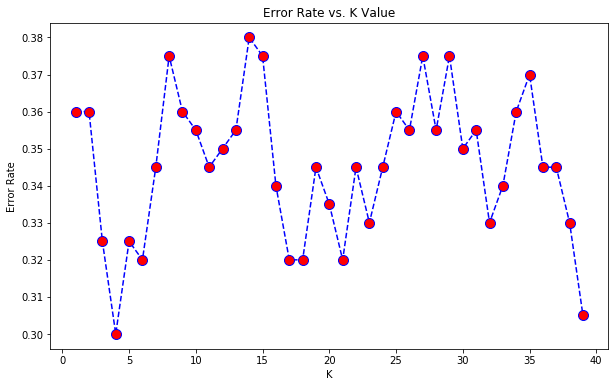

In [227]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Gaussian Naive Bayes Classifier

In [190]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predic=gnb.predict(x_test)

In [191]:
print(classification_report(y_test,predi))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        96
           1       0.76      0.62      0.68       104

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [192]:
gnb.score(x_test,y_test)

0.695

# Support Vector Machine Classifier

In [228]:
from sklearn.svm import SVC

In [229]:
svc=SVC()

In [230]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [231]:
predictions=svc.predict(x_test)

In [232]:
from sklearn.metrics import confusion_matrix

In [233]:
print(confusion_matrix(y_test,predictions))

[[88  8]
 [34 70]]


In [235]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        96
           1       0.90      0.67      0.77       104

    accuracy                           0.79       200
   macro avg       0.81      0.79      0.79       200
weighted avg       0.81      0.79      0.79       200



In [236]:
svc.score(x_test,y_test)

0.79